In [16]:
import numpy as np

# Define the grid configuration
grid = np.array([
    [0,  0,  0,  10],
    [0, -1,  -1,   0],
    [0,  0,  -1,   0],
    [1,  0,  0,   0]
])

# Define the starting position
start_pos = (3, 0)

# Define the possible actions
actions = ['up', 'down', 'left', 'right']

# Define the action directions
action_directions = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

def is_valid_position(position):
    """Check if the position is within the grid boundaries and not an obstacle."""
    x, y = position
    if x < 0 or x >= grid.shape[0] or y < 0 or y >= grid.shape[1]:
        return False
    if grid[x, y] == -1:
        return False
    return True


In [17]:
# Initialize the value function for all states to 0
V = np.zeros(grid.shape)

# Initialize the policy to randomly select actions
policy = np.random.choice(actions, size=grid.shape)

# Discount factor
gamma = 0.9
theta=1e-6

def compute_value_function(policy, V, grid, gamma=gamma ,theta=theta):
    """Perform policy evaluation to update the value function."""
    while True:
        delta = 0
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y] == -1:  # Skip obstacles
                    continue
                v = V[x, y]
                new_value = 0
                action = policy[x, y]
                dx, dy = action_directions[action]
                new_x, new_y = x + dx, y + dy
                if is_valid_position((new_x, new_y)):
                    reward = grid[new_x, new_y]
                    new_value = reward + gamma * V[new_x, new_y]
                V[x, y] = new_value
                delta = max(delta, abs(v - new_value))
        if delta < theta:
            break

def improve_policy(policy, V, grid, gamma=0.9):
    """Perform policy improvement to update the policy."""
    policy_stable = True
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] == -1:  # Skip obstacles
                continue
            old_action = policy[x, y]
            action_values = {}
            for action in actions:
                dx, dy = action_directions[action]
                new_x, new_y = x + dx, y + dy
                if is_valid_position((new_x, new_y)):
                    reward = grid[new_x, new_y]
                    action_values[action] = reward + gamma * V[new_x, new_y]
                else:
                    action_values[action] = -np.inf  # Invalid move
            best_action = max(action_values, key=action_values.get)
            policy[x, y] = best_action
            if best_action != old_action:
                policy_stable = False
    return policy_stable

# Policy iteration
def policy_iteration(policy, V, grid, gamma=0.9):
    while True:
        compute_value_function(policy, V, grid, gamma)
        if improve_policy(policy, V, grid, gamma):
            break


In [18]:
# Run policy iteration
policy_iteration(policy, V, grid, gamma)

# Display the optimal policy
for row in policy:
    print(row)


['right' 'right' 'right' 'down']
['up' 'right' 'left' 'up']
['up' 'down' 'down' 'up']
['right' 'right' 'right' 'up']


In [24]:
import matplotlib.pyplot as plt

def visualize_policy(policy, grid):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)
    
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] == -1:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='black'))
            elif grid[x, y] > 0:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='green'))
            else:
                # Draw the policy arrows
                action = policy[x, y]
                if action == 'up':
                    dx, dy = 0, -0.4
                elif action == 'down':
                    dx, dy = 0, 0.4
                elif action == 'left':
                    dx, dy = -0.4, 0
                elif action == 'right':
                    dx, dy = 0.4, 0
                ax.arrow(y, x, dx, dy, head_width=0.2, head_length=0.2, fc='blue', ec='blue')

    # Draw the grid
    for x in range(grid.shape[0] + 1):
        ax.axhline(x - 0.5, color='gray', lw=1)
    for y in range(grid.shape[1] + 1):
        ax.axvline(y - 0.5, color='gray', lw=1)
    
    ax.set_xticks(range(4))
    ax.set_yticks(range(4))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.invert_yaxis()
    plt.show()

def visualize_value_function(V, grid):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)
    
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            ax.text(y, x, round(V[x, y], 2), ha='center', va='center', fontsize=12)
            if grid[x, y] == -1:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='black'))
            elif grid[x, y] > 0:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='green'))

    # Draw the grid
    for x in range(grid.shape[0] + 1):
        ax.axhline(x - 0.5, color='gray', lw=1)
    for y in range(grid.shape[1] + 1):
        ax.axvline(y - 0.5, color='gray', lw=1)
    
    ax.set_xticks(range(4))
    ax.set_yticks(range(4))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.invert_yaxis()
    plt.show()


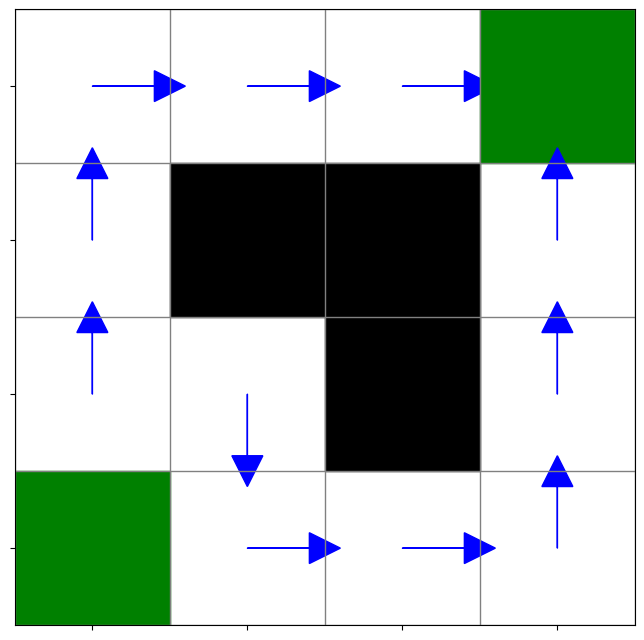

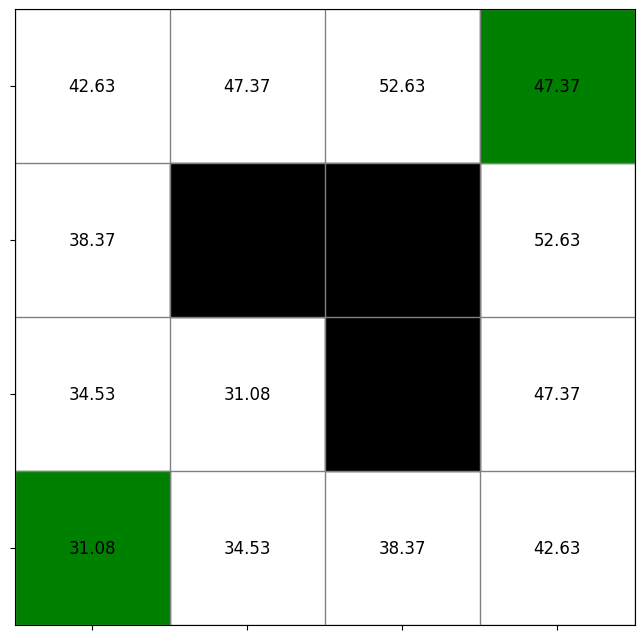

In [25]:
visualize_policy(policy, grid)
visualize_value_function(V, grid)